In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [321]:
dataset=pd.read_csv('/content/insurance.csv')

In [322]:
dataset.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [323]:
# description of dataset
print(dataset)

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


In [324]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [325]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [326]:
# checing for null values
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [327]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [328]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
dataset['sex']=lbl.fit_transform(dataset['sex'])


In [329]:
#after label encoding of sex column , female = 0 and male =1
dataset['sex'].unique()    

array([0, 1])

In [330]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [331]:
dataset['smoker']=lbl.fit_transform(dataset['smoker'])

In [332]:
dataset['smoker'].unique()   # smoker column, yes=1,no=0

array([1, 0])

In [333]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [334]:
# since there are 4 unqiue values in region column we will use one-hot encoding 

In [335]:
dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [336]:
encoded_data=pd.get_dummies(dataset,columns=['region'])
print(encoded_data)

      age  sex   bmi  children  smoker  expenses  region_northeast  \
0      19    0  27.9         0       1  16884.92                 0   
1      18    1  33.8         1       0   1725.55                 0   
2      28    1  33.0         3       0   4449.46                 0   
3      33    1  22.7         0       0  21984.47                 0   
4      32    1  28.9         0       0   3866.86                 0   
...   ...  ...   ...       ...     ...       ...               ...   
1333   50    1  31.0         3       0  10600.55                 0   
1334   18    0  31.9         0       0   2205.98                 1   
1335   18    0  36.9         0       0   1629.83                 0   
1336   21    0  25.8         0       0   2007.95                 0   
1337   61    0  29.1         0       1  29141.36                 0   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1                    0               

In [337]:
encoded_data.head()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,16884.92,0,0,0,1
1,18,1,33.8,1,0,1725.55,0,0,1,0
2,28,1,33.0,3,0,4449.46,0,0,1,0
3,33,1,22.7,0,0,21984.47,0,1,0,0
4,32,1,28.9,0,0,3866.86,0,1,0,0


In [338]:
dataset.corr()

<ipython-input-338-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,age,sex,bmi,children,smoker,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,0.787251
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,1.000000


In [339]:
# checking multi-collinearity, if correlation between independent feature is highly positivly or  highly negatively correlated  we can remove one of the feature 
 # and also checking collinearty between dependent and independent feature


 # we also the that relation between sex and age is almost 0 and also between sex and expense 

Text(0, 0.5, 'expenses')

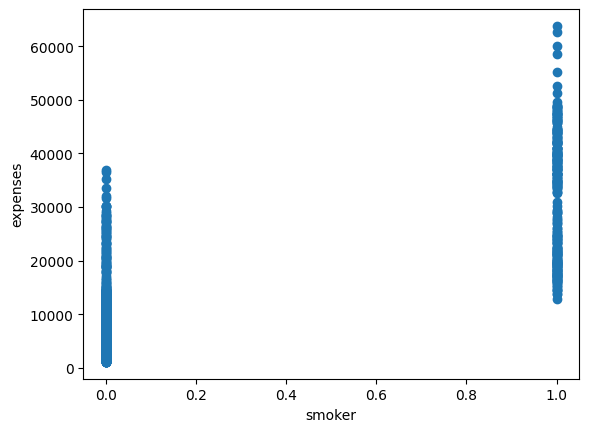

In [340]:
#among all feature, smoker is comparitively highly correlated with the target ie expense
plt.scatter(dataset['smoker'],dataset['expenses']) 
plt.xlabel('smoker')
plt.ylabel('expenses')

Text(0, 0.5, 'age')

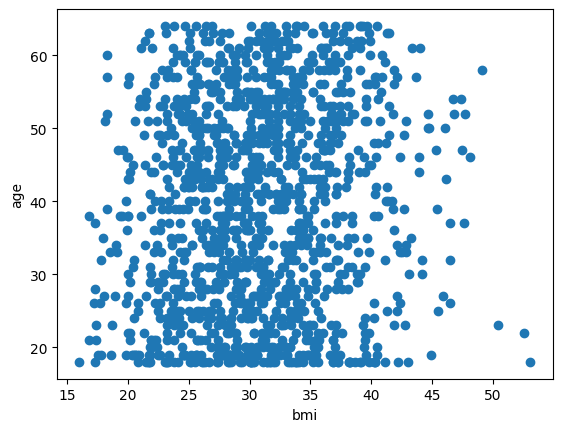

In [341]:
plt.scatter(dataset['bmi'],dataset['age'])
plt.xlabel('bmi')
plt.ylabel('age')

<Axes: xlabel='bmi', ylabel='smoker'>

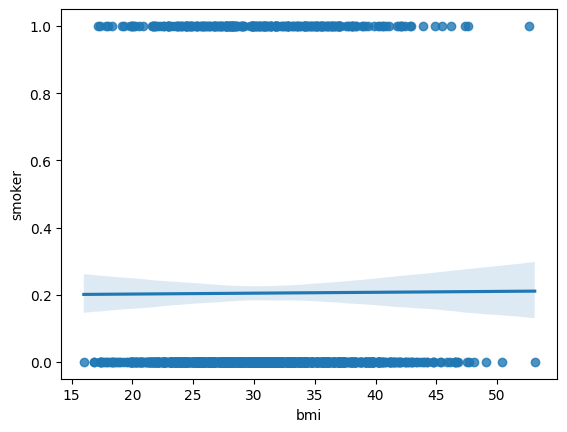

In [342]:
# regression plot  , bmi and smoker is having almost 0 correations, so features that are hardly correlated reduces error of model
import seaborn as sns
sns.regplot(x='bmi',y='smoker',data=dataset)

<Axes: xlabel='age', ylabel='expenses'>

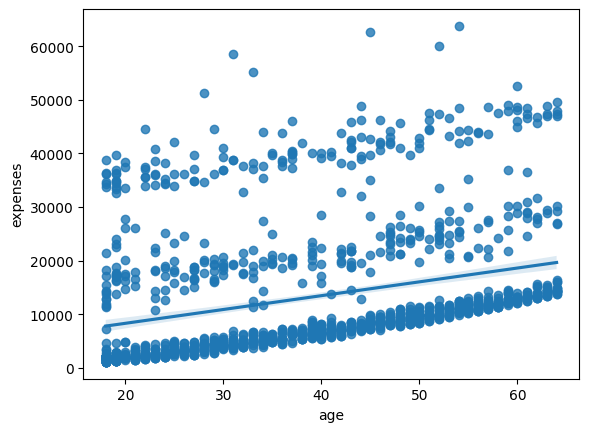

In [343]:
sns.regplot(x='age',y='expenses',data=dataset)    # some amount of negative corr is there
# as age increases expenses incrases

<Axes: xlabel='smoker', ylabel='expenses'>

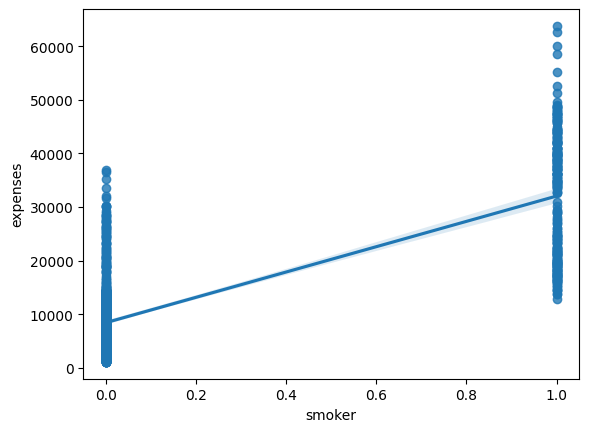

In [344]:
sns.regplot(x='smoker',y='expenses',data=dataset)

In [345]:
encoded_data.corr()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.198576,-0.138091,-0.135992,0.270144,-0.006398
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138091,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135992,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270144,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006398,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<Axes: xlabel='region_northeast', ylabel='region_northwest'>

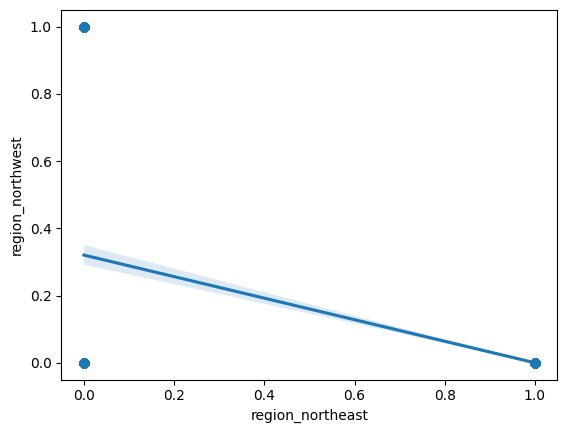

In [346]:
sns.regplot(x='region_northeast',y='region_northwest',data=encoded_data)   # we see negative correlation,if one is increasing the other is decreasing

In [347]:
# independent and dependent feature
x=encoded_data.drop('expenses',axis=1)
y=encoded_data['expenses']

In [263]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [264]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [265]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x_train=sd.fit_transform(x_train)
x_test=scaler=sd.transform(x_test)

In [266]:
x_train

array([[ 1.54446486, -1.02597835,  0.10949025, ...,  1.75708174,
        -0.59380229, -0.55760593],
       [ 0.48187425,  0.97467943, -0.49119089, ..., -0.56912549,
        -0.59380229,  1.79338122],
       [ 1.04858924, -1.02597835,  0.22628936, ..., -0.56912549,
         1.68406222, -0.55760593],
       ...,
       [ 1.33194673,  0.97467943, -0.89164499, ..., -0.56912549,
        -0.59380229, -0.55760593],
       [-0.15568012, -1.02597835,  2.84592657, ..., -0.56912549,
        -0.59380229,  1.79338122],
       [ 1.11942861,  0.97467943, -0.10742238, ..., -0.56912549,
        -0.59380229,  1.79338122]])

In [267]:
#model training

from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [268]:
reg.fit(x_train,y_train)

LinearRegression()

In [269]:
## print coefficients and intercept
print(reg.coef_)

[ 3.68632446e+03  1.16719187e+01  2.10428217e+03  4.98635728e+02
  9.54752032e+03 -1.96406010e+17 -1.93099566e+17 -1.97197684e+17
 -1.91064254e+17]


In [270]:
reg.intercept_

13382.109502246227

In [271]:
##prediction with test data
reg_pred=reg.predict(x_test)

In [272]:
reg_pred.shape

(402,)

In [273]:
reg_pred

array([ 9.19010950e+03,  7.39810950e+03,  3.71741095e+04,  9.75010950e+03,
        2.71901095e+04,  1.08861095e+04,  3.26109502e+02,  1.74941095e+04,
        1.14210950e+03,  1.15901095e+04,  2.76541095e+04,  9.75010950e+03,
        4.88610950e+03,  3.81981095e+04,  4.00861095e+04,  3.68061095e+04,
        1.51261095e+04,  3.55741095e+04,  8.80610950e+03,  3.16861095e+04,
        3.52610950e+03,  1.00541095e+04,  2.18210950e+03,  7.47810950e+03,
        1.16221095e+04,  1.33501095e+04,  1.45341095e+04,  6.42210950e+03,
        1.01981095e+04,  1.79810950e+03,  8.90210950e+03,  1.35101095e+04,
        4.24610950e+03,  3.54210950e+03,  4.29410950e+03,  1.35101095e+04,
        1.67010950e+03,  8.64610950e+03,  3.34621095e+04,  3.22301095e+04,
        3.59010950e+03,  4.66210950e+03,  1.41501095e+04,  1.18461095e+04,
        8.55010950e+03,  1.20381095e+04,  5.55810950e+03,  2.82210950e+03,
        3.51581095e+04,  8.93410950e+03,  1.57181095e+04,  1.97410950e+03,
        1.28541095e+04,  

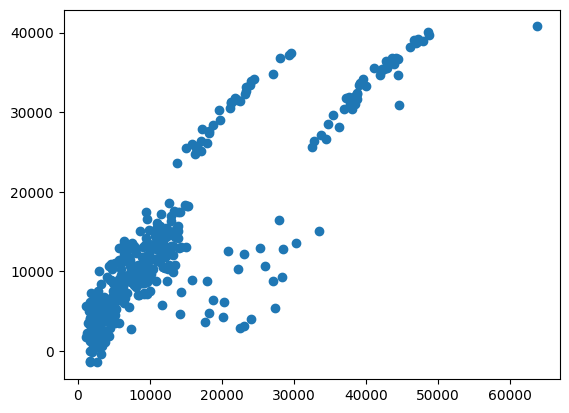

In [274]:
#plot scatter plot for prediction
plt.scatter(y_test,reg_pred)


In [275]:
# from the above plot we see that its almost linear so our reg_pred is almmost correct wrt to y_test

In [276]:
#now we calculate residual/ error
error=y_test-reg_pred

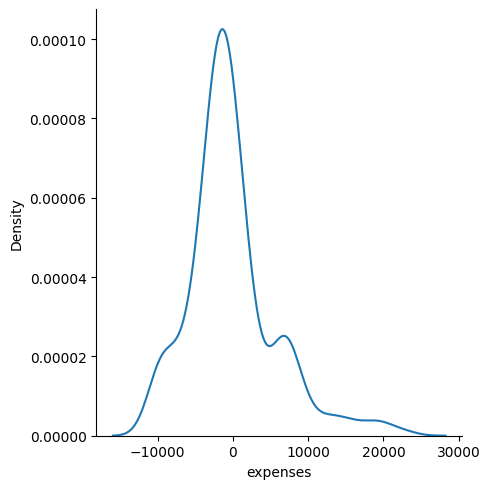

In [277]:
#plotting errors
sns.displot(error,kind='kde')

In [278]:
# in above graph we see that on right hand side there are some kind of outliers and errors

# there max differnece btw -10k to 10k and some points btw 20k to 30k
#if we get normal distribution of our errors then our model is working right 

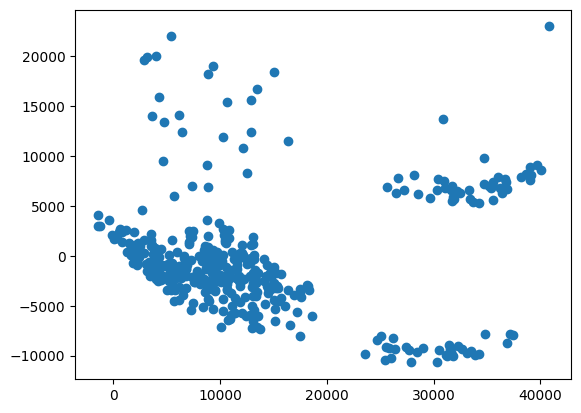

In [279]:
# scatter with respect to predictions and error
plt.scatter(reg_pred,error)

In [280]:
# in above grpah we see that there is almost uniform distribution of points so its somehow better model

In [281]:
#performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

4143.370517994049
33723174.20039474
5807.165763123586


In [282]:
from sklearn.metrics import r2_score
print(r2_score(y_test,reg_pred))

0.7700028431302995


In [283]:
x_train.shape

(936, 9)

**POLYNOMIAL REGRESSION**

In [348]:
## using polynomial regression 
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x)


In [349]:
from sklearn.model_selection import train_test_split
x_poly_train,x_poly_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.3,random_state=42)

In [351]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_poly_train,y_train)

LinearRegression()

In [317]:
x_poly_train.shape

(936, 55)

In [352]:
#prediction
poly_pred = model.predict(x_poly_test)

(936,)

(402, 9)

(402,)

In [353]:
error_1=y_test-poly_pred

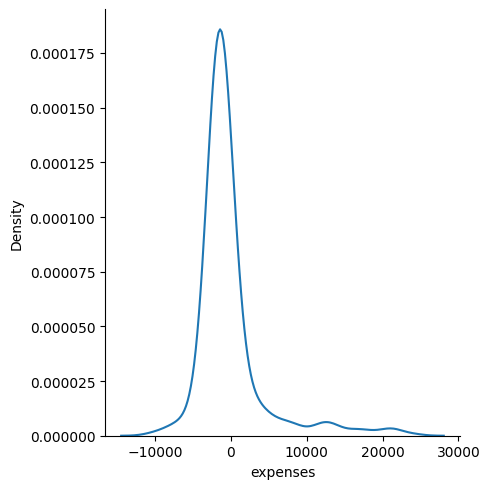

In [354]:
sns.displot(error_1,kind='kde')

In [355]:
##  above graph has better normal distribution graph than linear regression

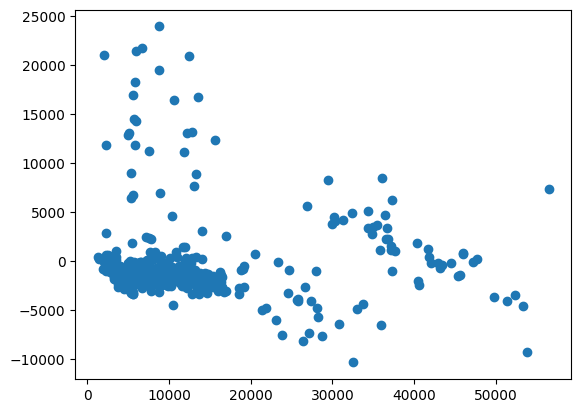

In [356]:
plt.scatter(poly_pred,error_1)


In [114]:
# better uniform distribution 

In [357]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,poly_pred))
print(mean_squared_error(y_test,poly_pred))
print(np.sqrt(mean_squared_error(y_test,poly_pred)))

2713.6019099813434
20758235.408962924
4556.120653468576


In [358]:
from sklearn.metrics import r2_score
print(r2_score(y_test,poly_pred)) 


0.8584256897846368


In [360]:
poly_pred

array([11327.5703125,  5467.953125 , 33728.09375  , 10908.421875 ,
       29917.46875  ,  3483.09375  ,  2387.84375  , 16358.484375 ,
        3452.3671875, 12516.390625 , 19005.7109375,  9659.53125  ,
        5815.2734375, 49783.6796875, 53262.390625 , 45649.1796875,
       10351.546875 , 41706.8984375,  9830.3125   , 25834.1640625,
        2237.5078125,  8201.203125 ,  2280.40625  ,  4998.5546875,
       12466.46875  , 12672.1875   , 14794.296875 ,  7569.609375 ,
       12206.3984375,  3713.4140625,  8849.8515625, 12002.6015625,
        3238.90625  ,  5742.       ,  3695.421875 ,  8206.6953125,
        4228.828125 ,  9000.       , 24739.359375 , 37113.8828125,
        4966.703125 ,  5225.8984375, 13553.203125 , 13407.0390625,
        7222.796875 , 14208.40625  ,  5930.9140625,  5059.078125 ,
       40310.9765625,  6450.9921875, 15385.78125  ,  4493.234375 ,
        6741.8671875,  3298.8515625, 13439.1796875, 12218.4765625,
        4333.703125 , 36525.1875   , 14055.7109375, 12330.5234

In [366]:
model.predict(poly_reg.fit_transform([[15,1,25,2,1,0,0,0,0]]))

array([18193.7421875])

(936, 55)

In [367]:
import pickle

In [368]:
pickle.dump(model,open('regression_model.pkl','wb'))

In [369]:
#loading pickle model
pickled_model=pickle.load(open('regression_model.pkl','rb'))

In [371]:
pickled_model.predict(poly_reg.fit_transform([[15,1,25,2,1,0,0,0,0]]))   

array([18193.7421875])

In [ ]:
#got same output from pickle as above